# Audio Classification Using Deep Learning

## 5. Summary

### Performance comparison

I have trained and evaluated the two types of models from two types of features. In total, we have four models as follows:
* CNN model + Mel feature
* CNN model + MFCC feature
* LSTM model + Mel feature
* LSTM model + MFCC feature

The models and their evaluation scores on testing set have been stored on `results` directory. Now, we want to load these scores for performance benchmark purpose. These results are from models without hyperparameter optimisation. Due to limited time and compute capability, I have not been able to optimise all the models.

In [3]:
import os
import pandas as pd

result_dir = 'results'
features = ['mel','mfcc']
model_types = ['cnn','lstm']

f1_scores = []
labels = []
for feature in features:
    for model_type in model_types:
        report_file = os.path.join(result_dir,feature+'_'+model_type+'_test.csv')
        report = pd.read_csv(report_file,index_col=0)
        f1_scores.append(report['f1-score']['macro avg'])
        labels.append(feature+'_'+model_type)

The performanace comparison across different models is shown below. It suggests that even though the models are quite simple, the performance is good enough. There seems to be only marginal performance difference among models. The performance can be improved further by exploring different architecture coupled with hyperparameter optimisation.

Storing figure into a file: results\model_comparison.png


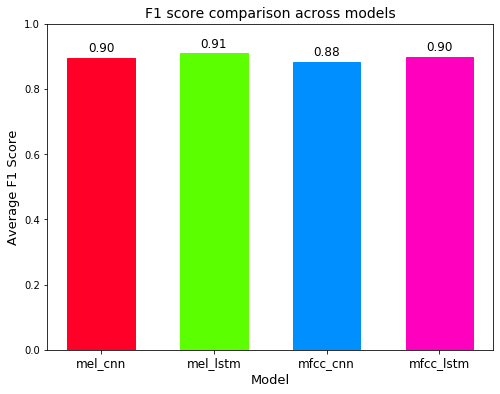

In [4]:
from plotting import plot_model_comparison

fig, ax = plot_model_comparison(f1_scores,labels)
# store the plot into .png file
figure_file = os.path.join(result_dir,'model_comparison.png')
print ("Storing figure into a file: "+figure_file)
fig.savefig(figure_file, bbox_inches='tight')